## Response Time prediction and user Recommendation on Stack Overflow

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import Responsetime_prediction_model as responsetime_model
import data_clean_up as clean_func
import eda_functions as ed_fun
warnings.filterwarnings("ignore")

### Data

The data for our project spans from 2008 to 2021, which makes it quite large to push onto github. For the same reason we have uploaded our EDA datasets on a google drive (https://drive.google.com/drive/folders/1C5gI3WY4aV3RvVojjpuKX4rjXacQH36g?usp=sharing) and for our ML stats we have used the stack overflow public datasets available of Bigquery (https://console.cloud.google.com/marketplace/product/stack-exchange/stack-overflow)

A very small subset of the data is available in our repository as (Answers.csv, Questions.csv and Tags.csv), to help explain the merging and the cleaning of data for our project

In [2]:
answers_df = pd.read_csv('Answers_subset.csv')
display(answers_df.head(n=2))
questions_df = pd.read_csv('Questions_subset.csv')
display(questions_df.head(n=2))
tags_df = pd.read_csv('Tags.csv')
display(tags_df.head(n=2))

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92.0,61.0,2008-08-01T14:45:37Z,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124.0,26.0,2008-08-01T16:09:47Z,80.0,12.0,<p>I wound up using this. It is a kind of a ha...


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


,Id,Tag
0,80,flex
1,80,actionscript-3


The dataset is splits into three different tables, which requires us to first merge all the data based on the Id and parentID heirarchy relation

In [3]:
merged_data = clean_func.merge_data(answers_df, questions_df, tags_df)
display(merged_data.head(n=2))

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Body_x,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Body_y,Id,Tag
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,92.0,61.0,2008-08-01T16:09:47Z,80.0,13.0,[<p>I wound up using this. It is a kind of a h...,80,"[flex, actionscript-3, air]"
1,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,124.0,26.0,2008-08-01T14:45:37Z,90.0,12.0,"[<p><a href=""http://svnbook.red-bean.com/"">Ver...",90,"[svn, tortoisesvn, branch, branching-and-merging]"


Here we can see that both the Body_x (Question body) and Body_y (Answer body) have a lot of free text and html tags. We apply a clean up function to clean this up. Here beautiful soup is used to remove the html tags. Regular expressions are used to remove urls, special symbols, etc, from the data. Python librarys like nltk are used to remove stop words and apply lemmatization.




In [4]:
# html parsing question body and cleaning
merged_data["Body_x"] = merged_data["Body_x"].apply(clean_func.html_parser)
merged_data["Body_x"] = merged_data["Body_x"].apply(clean_func.clean_up_data)

display(merged_data.head(n=2))

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Body_x,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Body_y,Id,Tag
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,ive written database generation script sql wan...,92.0,61.0,2008-08-01T16:09:47Z,80.0,13.0,[<p>I wound up using this. It is a kind of a h...,80,"[flex, actionscript-3, air]"
1,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,really good tutorials explaining branching mer...,124.0,26.0,2008-08-01T14:45:37Z,90.0,12.0,"[<p><a href=""http://svnbook.red-bean.com/"">Ver...",90,"[svn, tortoisesvn, branch, branching-and-merging]"


we have already saved the merged of the entire dataset in the csv file called stackoverflow_2008.csv, the clean dataset as stackoverflow_2008_clean.csv, and shared it on the google drive, since we can't push all the data to our repository.

### ML Models/Stats

1. Predicting the response time of a question based on the tags 
The goal here is to predict the response time for any given question under two classifications, that is whether the question will be answered within a day's time or after a day's time


A notebook (Responsetimepredicition_Stackoverflow_Query.ipynb) is used to run this query for which you would need a Bigquery json key. Place a copy of your json key (named as "bigquery_json_key.json") in the folder before running the notebook file.


This ML model was made using the dataset available on the Bigquery public data sets and a subset of the dataset and some features are generated using the query module. The notebook runs the query and then stores the query results in a csv file (Responsetime_prediction_features.csv) for future use. The running of this notebook is not shown in the report, hence we are directly importing the data from the csv file

In order to deal with the large data we have taken a subset of the data between the time period of Jan 2020 to Dec 2021

In [5]:
df = pd.read_csv("Responsetime_prediction_features.csv")
display(df.head(n = 2))
print("The features to be considered for our model are [questions, avg_respone_time_min, answered_percent]")

,Unnamed: 0,questions,tag,avg_response_time_min,answered_percent
0,0,572193,python,57.24,77.35
1,1,419231,javascript,49.36,76.82


The features to be considered for our model are [questions, avg_respone_time_min, answered_percent]


In [6]:
print("Defining the labels here into two sectors, questions answered within a day (1) and questions \
answered after a day (0) for our classification problem")
df["label"] = np.where(df["avg_response_time_min"] <= 3600, 1, 0)
display(df.head(n = 2))
print("Now checking the number of samples for each class i.e. the granularity of our dataset")
responsetime_model.check_dataset_granularity(df)

Defining the labels here into two sectors, questions answered within a day (1) and questions answered after a day (0) for our classification problem


,Unnamed: 0,questions,tag,avg_response_time_min,answered_percent,label
0,0,572193,python,57.24,77.35,1
1,1,419231,javascript,49.36,76.82,1


Now checking the number of samples for each class i.e. the granularity of our dataset
Number of questions answered within a day:  40966
Number of questions answered after a day:  8767


In [7]:
print("The dataset is clearly imbalanced here, inorder to fix this we are only going to select the first 8767 rows where \
the label is 1 and check the granularity again \n")
df = responsetime_model.balance_dataset(df)
responsetime_model.check_dataset_granularity(df)

The dataset is clearly imbalanced here, inorder to fix this we are only going to select the first 8767 rows where the label is 1 and check the granularity again 

Number of questions answered within a day:  8767
Number of questions answered after a day:  8767


In [8]:
print("Creating the logistic regression model, and splits the data into train and test sets")

print("Then creates the model using sklearn library and returns the test data and model for prediction")
repsonsetime_X_test, responetime_y_test, respontime_logregmodel = responsetime_model.create_model(df)

Creating the logistic regression model, and splits the data into train and test sets
Then creates the model using sklearn library and returns the test data and model for prediction


In [9]:
print("Making predictions using the logistic regression model, the scores of the predictions are available in the ")
responetime_y_pred=respontime_logregmodel.predict(repsonsetime_X_test)

Making predictions using the logistic regression model, the scores of the predictions are available in the 


2. User Prediction
The objective of this exercise was to find the best users to answer a certain question based on the "tags" inputted. "Tags" for StackOverflow are usually categories this question would be placed in. This would include but is not limited to technologies, frameworks or even concepts. 

The data cleanup as well ad modeling was done in BigQquery here on Google Cloud Platform. The two SQL files contain the code to run on BigQuery. 

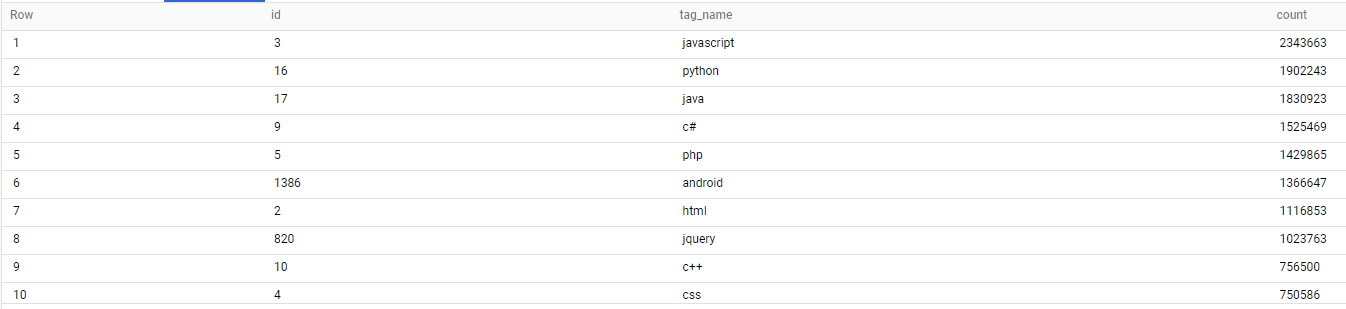

There were a huge number of tags but exlcuding tags there weren't used more than a 1000 times in the entire history of the website downsized the number by a lot.

Surprisingly, even with the User ID data, there were NULL values as well values such as '0' which needed to be cleaned up. Specifically there were 430990 such records. Also, Only accepted answers were considered here. 



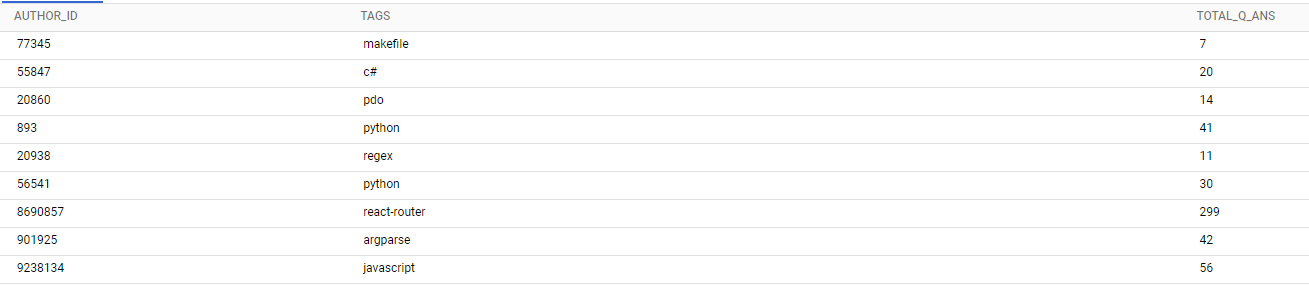

This is how the formatted data looks, which is then used as input for a 10 cluster, 20 iteration k-means model.  

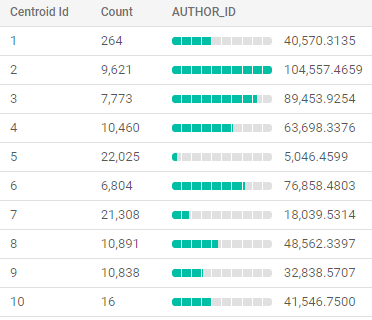
These were the final clusters

### Visualizations

To run the following visualizations please download the "Answers.csv", "Questions.csv", and "Tags.csv" from the google drive and place it in the same folder as the notebook

#### Quality of Answers over the years

The barplot given below shows the average score of answers to questions asked every year from 2008-2016. The Score on the Y-axis is calculated from the upvotes on the answers. This plot clearly shows the decrease in the quality of answers. It is due to two main reasons, first is that the number of questions has increased over the years, a lot of which goes unanswered or have low quality answers (less upvotes). Secondly, most questions have multiple answers in recent years and not all of them are upvoted, this also leads to a low quality score.

In [10]:
merged_data_full = clean_func.full_data()

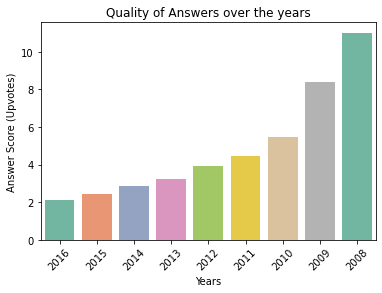

In [11]:
ed_fun.answer_quality(merged_data_full)

#### Popularity of Answers and Questions

We want a better idea about the popularity of answer and questions, so we do so by visualizing the count of scores based on score value ranges. This can be done by extracting the scores and then putting them in a new columns which have the ranges. The scores are chosen based on the conditions and the count is taken. based on the counts which is in thousands we can clearly see that the mejority of questions and answers are between the score 0 to 5 and most answers and questions have a score of 0. 

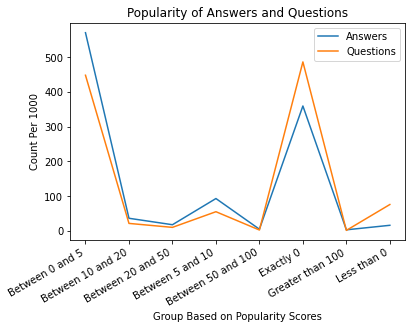

In [12]:
ed_fun.popularity_ans_ques(merged_data_full)

### Reply time with respect to the Question Score

While we were looking at minimum time we found that most of the questions get answered within a single day. We were then curious if there is a relation between reply time and the question score we divided question score in group of 50 and calculated boxplot for each group. We found out that there was highest gap in reply time for the score with question score between 1 and 50. And other groups were answered much earlier than the first group. This might be due to the question of higher score may be of higher importance or usefulness than others.

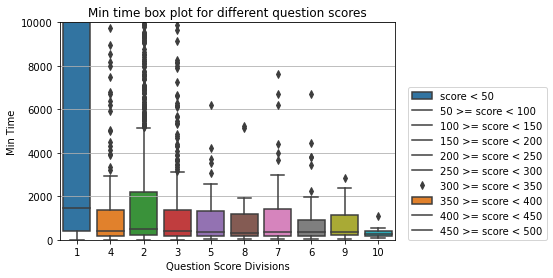

In [13]:
ed_fun.min_reply_time(merged_data_full)

### Results

1. Response time prediction ML model:

The results of this model are as follows

Accuracy: 0.9997660271408516
Precision: 0.9996249062265566
Recall: 1.0
F1 score:  0.9998124179328456


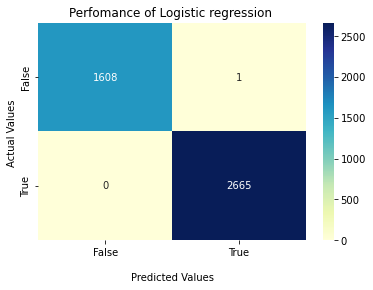

In [10]:
responsetime_model.compute_stats(responetime_y_test, responetime_y_pred)
responsetime_model.plot_confusion_matrix(responetime_y_test, responetime_y_pred)

While the accuracy is really good, We believe this is because over 95% of newly posted questions get answered within a days time on stackoverflow. We could see a dip in the accuracy when we break the classification into smaller classes, i.e. within 4 hours, 4-8 hours and so on.  

The benefit of this ML stat to the stakeholders is that they can identify groups according to the tag domains, promote these groups and onboard new experts for the lacking domains

2. User recommendation model

The results of this model are as follows

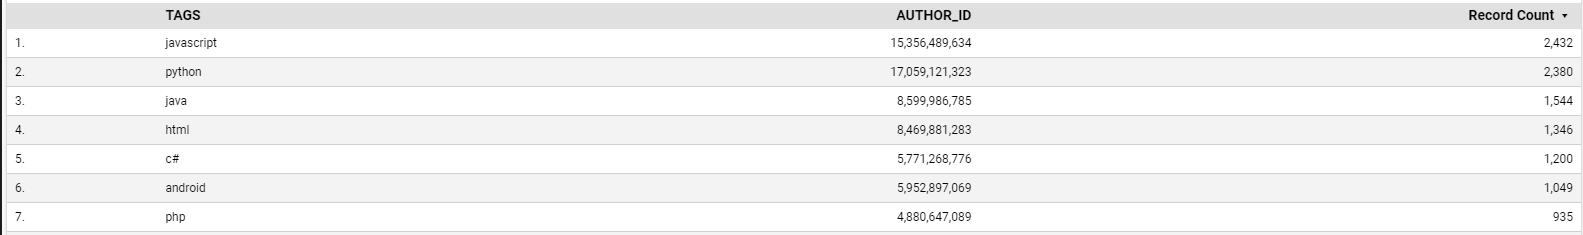

These were some results we could see for some arbitrary tags

The final Davies–Bouldin index was 4.224 and Mean squared distance was 1.2499. Even though the clustering is of type soft, the Davies-Bouldin index is a bit the higher side. The Mean squared distance however, is within an acceptable range. 
